In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/data/train.csv", sep = ";")
test_data = pd.read_csv("/content/drive/MyDrive/data/test.csv", sep = ";")

## Train_data

In [ ]:
train_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [ ]:
train_data.shape

(6000, 13)

In [ ]:
train_data.describe()

,year,selling_price,km_driven,seats
count,6000.000000,6.000000e+03,6.000000e+03,5841.000000
mean,2013.814833,6.387764e+05,6.997216e+04,5.429550
std,4.026733,8.066632e+05,5.188961e+04,0.977071
min,1983.000000,3.000000e+04,1.000000e+03,2.000000
25%,2011.000000,2.557498e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.900000e+04,5.000000
max,2020.000000,1.000000e+07,1.500000e+06,14.000000


In [ ]:
print(train_data['fuel'].unique())
print(train_data['transmission'].unique())
print(train_data['owner'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [ ]:
train_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          159
engine           159
max_power        154
torque           160
seats            159
dtype: int64

In [ ]:
train_data['brand'] = train_data['name'].apply(lambda x: x.split()[0])
train_data.brand.value_counts()

Maruti           1792
Hyundai          1034
Mahindra          595
Tata              546
Toyota            366
Honda             335
Ford              288
Chevrolet         170
Renault           164
Volkswagen        136
BMW                83
Skoda              77
Nissan             60
Jaguar             52
Volvo              50
Datsun             49
Mercedes-Benz      44
Fiat               38
Audi               30
Lexus              27
Jeep               23
Mitsubishi         12
Land                6
Force               5
Isuzu               5
Kia                 4
Ambassador          3
Daewoo              2
Opel                1
Ashok               1
MG                  1
Peugeot             1
Name: brand, dtype: int64

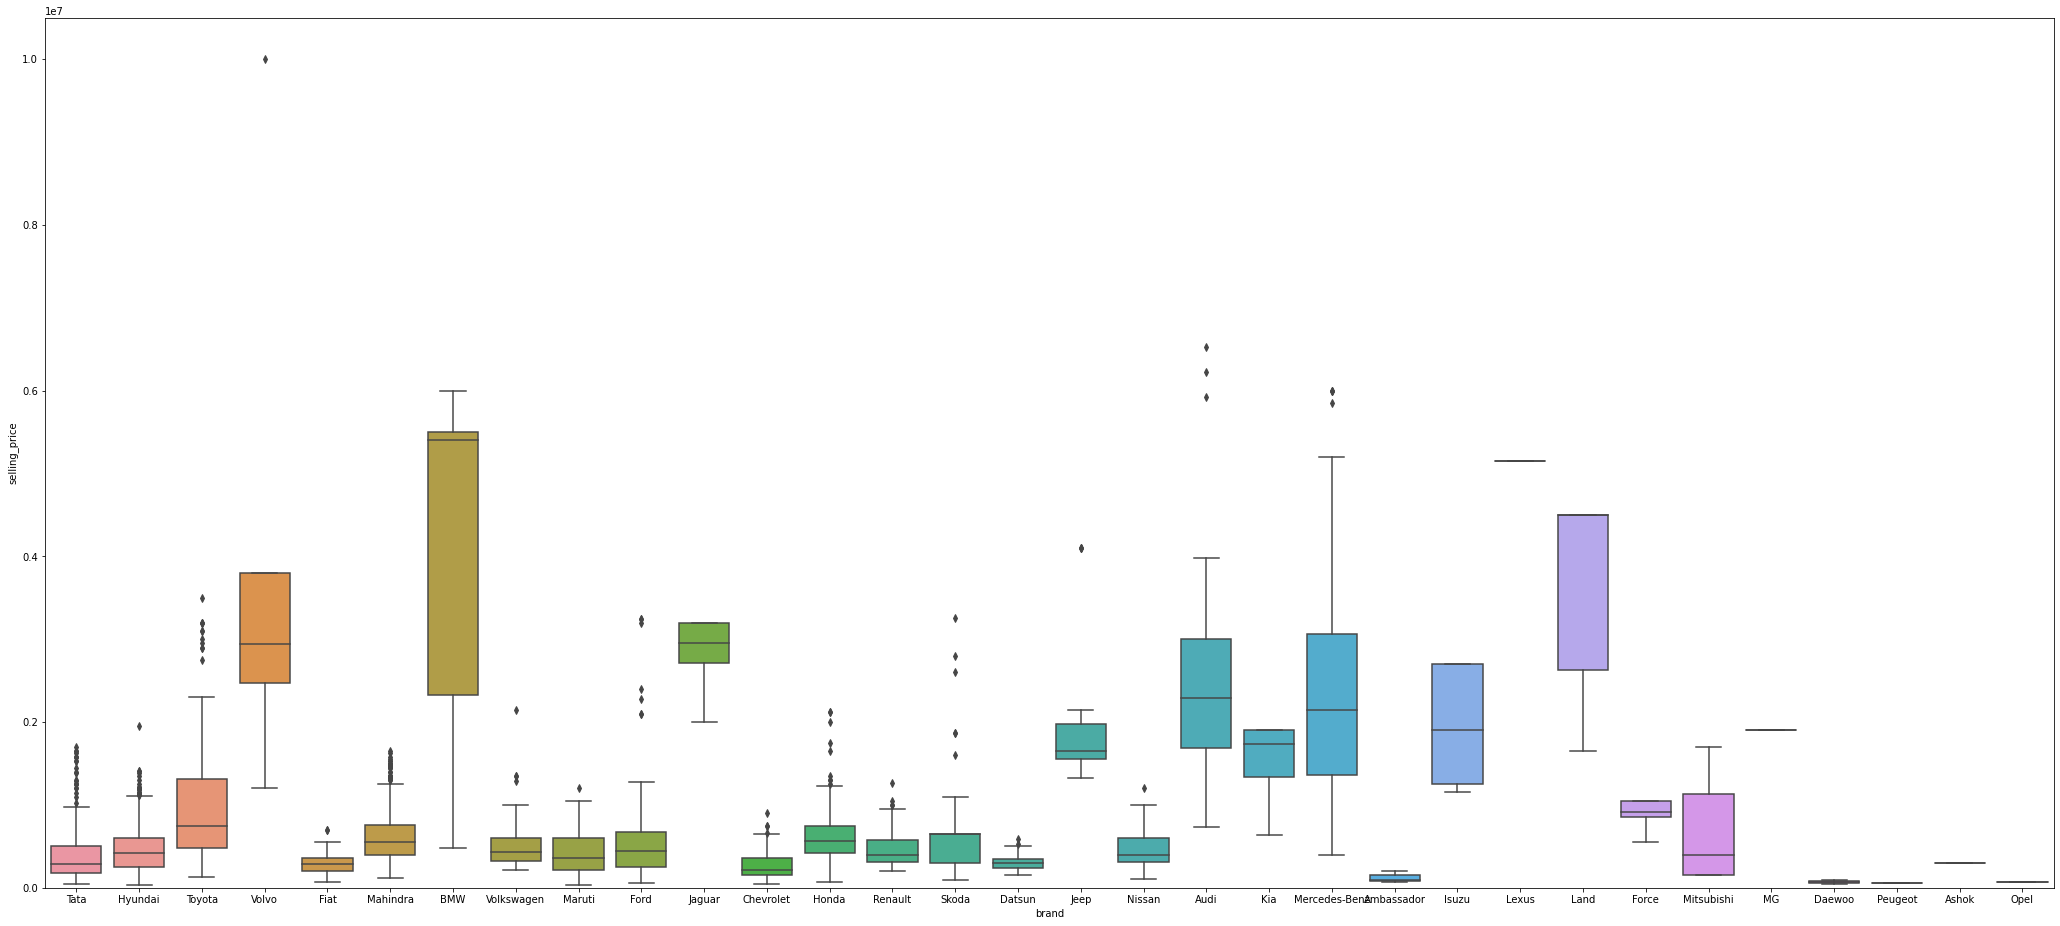

In [ ]:
var = 'brand'
data = pd.concat([train_data['selling_price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(36, 16))
fig = sns.boxplot(x=var, y="selling_price", data=data)
fig.axis(ymin=0);

In [ ]:
luxury_brand = ['Volvo', 'BMW','Jaguar', 'Audi','Mercedes-Benz','Isuzu','Lexus','Land']
train_data['brand'] = train_data['name'].apply(lambda x: 'Luxury_brand' if x.split()[0] in luxury_brand else 'Popularly_brand')
'''
1: Luxury brand
2: Popularly brand
'''
train_data.brand.value_counts()

Popularly_brand    5703
Luxury_brand        297
Name: brand, dtype: int64

In [ ]:
brand = train_data['brand']
brand = pd.get_dummies(brand, drop_first=True)
brand.head()

,Popularly_brand
0,1
1,1
2,1
3,1
4,0


In [ ]:
train_data['mileage_n']=train_data.mileage.str.extract(r'(\d+.\d+)').astype('float')
train_data['engine_n']=train_data.engine.str.extract(r'(\d+.\d+)').astype('float')
train_data['max_power_n']=train_data.max_power.str.extract(r'(\d+.\d+)').astype('float')

In [ ]:
train_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,mileage_n,engine_n,max_power_n
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,Popularly_brand,21.50,1497.0,108.50
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0,Popularly_brand,21.19,1396.0,88.76
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0,Popularly_brand,12.55,2982.0,168.50
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0,Popularly_brand,17.01,1591.0,121.30
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,Luxury_brand,18.00,1969.0,190.00


In [ ]:
train_data = train_data.reset_index(drop=True)

In [ ]:
train_data.shape

(6000, 17)

In [ ]:
train_data["years_driven"]=int(2021)-train_data['year']

In [ ]:
train_data.drop(["name"],axis=1,inplace=True)
train_data.drop(["mileage"],axis=1,inplace=True)
train_data.drop(["engine"],axis=1,inplace=True)
train_data.drop(["max_power"],axis=1,inplace=True)
train_data.drop(["torque"],axis=1,inplace=True)
train_data.drop(["year"],axis=1,inplace=True)

In [ ]:
train_data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,mileage_n,engine_n,max_power_n,years_driven
0,850000,9500,Diesel,Individual,Manual,First Owner,5.0,Popularly_brand,21.50,1497.0,108.50,3
1,750000,30000,Diesel,Individual,Manual,First Owner,5.0,Popularly_brand,21.19,1396.0,88.76,3
2,1500000,80000,Diesel,Individual,Automatic,Second Owner,7.0,Popularly_brand,12.55,2982.0,168.50,6
3,795000,35000,Petrol,Individual,Manual,First Owner,5.0,Popularly_brand,17.01,1591.0,121.30,6
4,3800000,20000,Diesel,Individual,Automatic,First Owner,5.0,Luxury_brand,18.00,1969.0,190.00,2


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6000 non-null   int64  
 1   km_driven      6000 non-null   int64  
 2   fuel           6000 non-null   object 
 3   seller_type    6000 non-null   object 
 4   transmission   6000 non-null   object 
 5   owner          6000 non-null   object 
 6   seats          5841 non-null   float64
 7   brand          6000 non-null   object 
 8   mileage_n      5841 non-null   float64
 9   engine_n       5841 non-null   float64
 10  max_power_n    4437 non-null   float64
 11  years_driven   6000 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 562.6+ KB


In [ ]:
train_data = train_data.fillna(method = "bfill")

##Visualization 

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


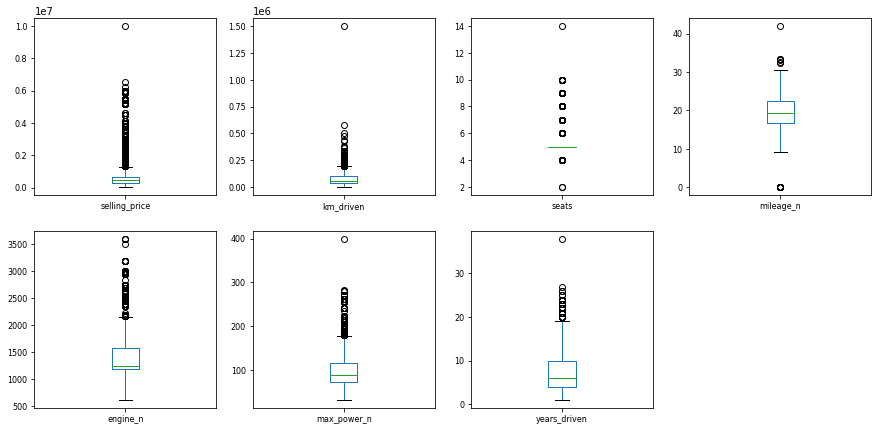

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
train_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

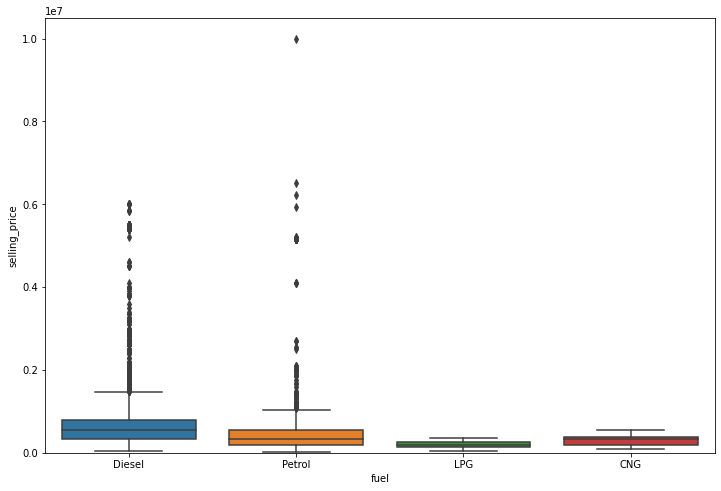

In [ ]:
var = 'fuel'
data = pd.concat([train_data['selling_price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="selling_price", data=data)
fig.axis(ymin=0);

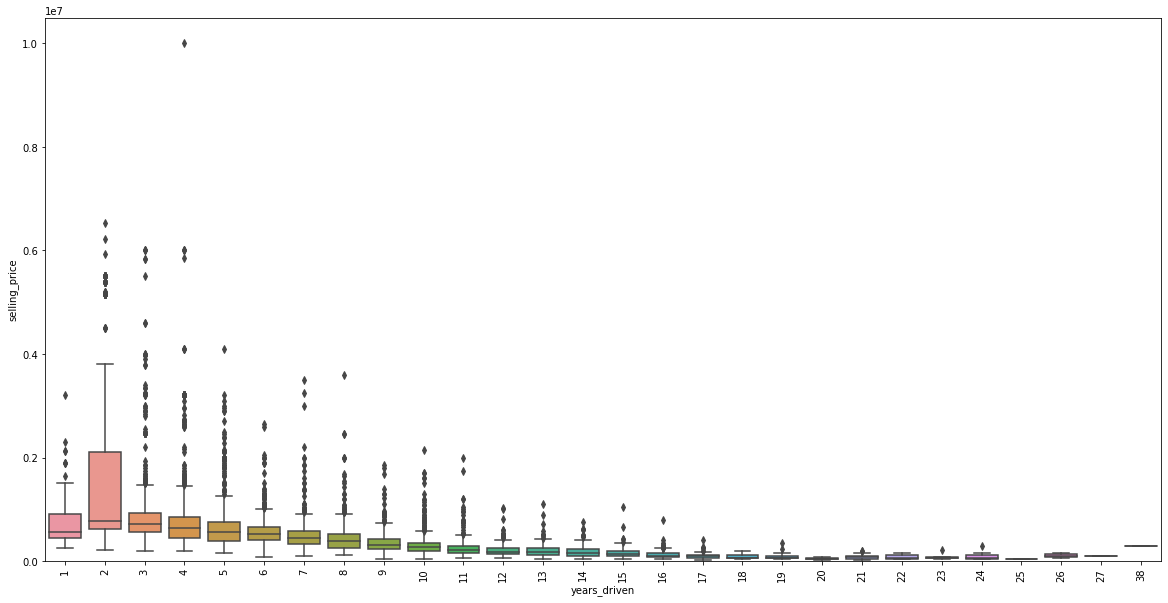

In [ ]:
var = 'years_driven'
data = pd.concat([train_data['selling_price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="selling_price", data=data)
fig.axis(ymin=0);
plt.xticks(rotation=90);

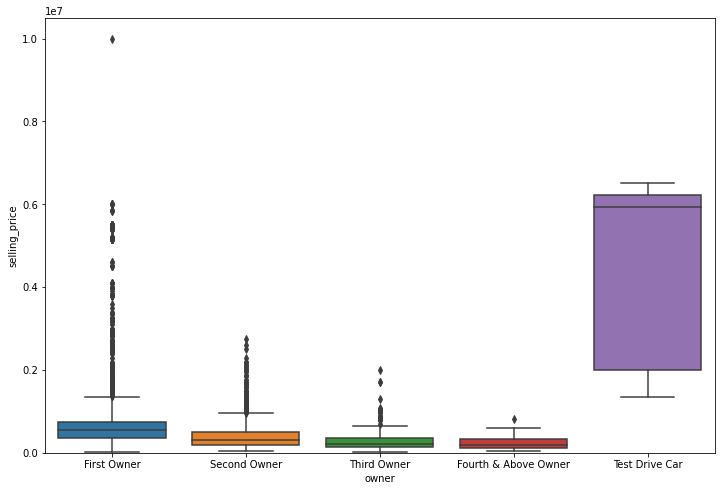

In [ ]:
var = 'owner'
data = pd.concat([train_data['selling_price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="selling_price", data=data)
fig.axis(ymin=0);

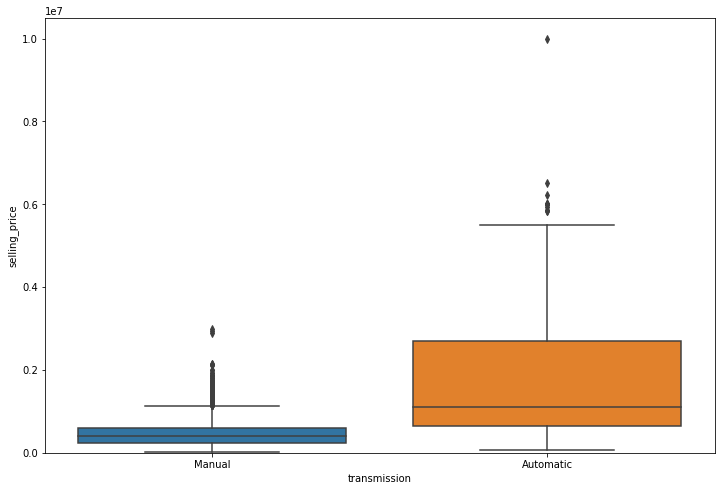

In [ ]:
var = 'transmission'
data = pd.concat([train_data['selling_price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="selling_price", data=data)
fig.axis(ymin=0);

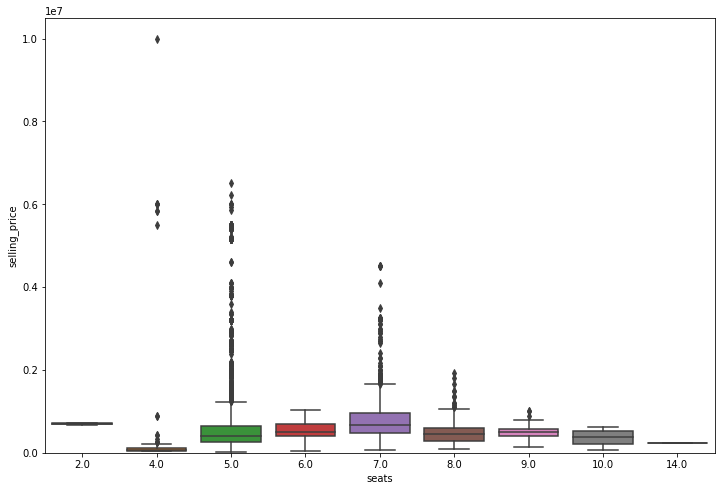

In [ ]:
var = 'seats'
data = pd.concat([train_data['selling_price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="selling_price", data=data)
fig.axis(ymin=0);

##Categorical Data

In [ ]:
var = 'fuel'
train_data[var].value_counts()

Diesel    3265
Petrol    2664
CNG         44
LPG         27
Name: fuel, dtype: int64

In [ ]:
fuel_t = train_data[[var]]
fuel_t = pd.get_dummies(fuel_t, drop_first=True)
fuel_t.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [ ]:
var = 'transmission'
train_data[var].value_counts()


Manual       5228
Automatic     772
Name: transmission, dtype: int64

In [ ]:
transmission = train_data[[var]]
transmission = pd.get_dummies(transmission, drop_first=True)
transmission.head()

,transmission_Manual
0,1
1,1
2,0
3,1
4,0


In [ ]:
var = 'seller_type'
train_data[var].value_counts()

Individual          5006
Dealer               820
Trustmark Dealer     174
Name: seller_type, dtype: int64

In [ ]:
seller_type = train_data[[var]]
seller_type = pd.get_dummies(seller_type, drop_first=True)
seller_type.head()

,seller_type_Individual,seller_type_Trustmark Dealer
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
var = 'owner'
train_data[var].value_counts()

First Owner             3904
Second Owner            1558
Third Owner              414
Fourth & Above Owner     119
Test Drive Car             5
Name: owner, dtype: int64

In [ ]:
train_data.replace({"First Owner":1,"Second Owner":2,"Third Owner": 3,"Fourth & Above Owner":4,"Test Drive Car":5},inplace=True)
train_data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,mileage_n,engine_n,max_power_n,years_driven
0,850000,9500,Diesel,Individual,Manual,1,5.0,Popularly_brand,21.50,1497.0,108.50,3
1,750000,30000,Diesel,Individual,Manual,1,5.0,Popularly_brand,21.19,1396.0,88.76,3
2,1500000,80000,Diesel,Individual,Automatic,2,7.0,Popularly_brand,12.55,2982.0,168.50,6
3,795000,35000,Petrol,Individual,Manual,1,5.0,Popularly_brand,17.01,1591.0,121.30,6
4,3800000,20000,Diesel,Individual,Automatic,1,5.0,Luxury_brand,18.00,1969.0,190.00,2


In [ ]:
final_train= pd.concat([train_data,fuel_t,transmission,seller_type, brand],axis=1)
final_train.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,mileage_n,engine_n,max_power_n,years_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,Popularly_brand
0,850000,9500,Diesel,Individual,Manual,1,5.0,Popularly_brand,21.50,1497.0,108.50,3,1,0,0,1,1,0,1
1,750000,30000,Diesel,Individual,Manual,1,5.0,Popularly_brand,21.19,1396.0,88.76,3,1,0,0,1,1,0,1
2,1500000,80000,Diesel,Individual,Automatic,2,7.0,Popularly_brand,12.55,2982.0,168.50,6,1,0,0,0,1,0,1
3,795000,35000,Petrol,Individual,Manual,1,5.0,Popularly_brand,17.01,1591.0,121.30,6,0,0,1,1,1,0,1
4,3800000,20000,Diesel,Individual,Automatic,1,5.0,Luxury_brand,18.00,1969.0,190.00,2,1,0,0,0,1,0,0


In [ ]:
final_train.drop(["fuel","transmission","seller_type","brand"],axis=1,inplace=True)
final_train.head()

,selling_price,km_driven,owner,seats,mileage_n,engine_n,max_power_n,years_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,Popularly_brand
0,850000,9500,1,5.0,21.50,1497.0,108.50,3,1,0,0,1,1,0,1
1,750000,30000,1,5.0,21.19,1396.0,88.76,3,1,0,0,1,1,0,1
2,1500000,80000,2,7.0,12.55,2982.0,168.50,6,1,0,0,0,1,0,1
3,795000,35000,1,5.0,17.01,1591.0,121.30,6,0,0,1,1,1,0,1
4,3800000,20000,1,5.0,18.00,1969.0,190.00,2,1,0,0,0,1,0,0


In [ ]:
final_train.shape

(6000, 15)

## Test_data

In [ ]:
test_data.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2128 non-null   int64  
 1   name          2128 non-null   object 
 2   year          2128 non-null   int64  
 3   km_driven     2128 non-null   int64  
 4   fuel          2128 non-null   object 
 5   seller_type   2128 non-null   object 
 6   transmission  2128 non-null   object 
 7   owner         2128 non-null   object 
 8   mileage       2066 non-null   object 
 9   engine        2066 non-null   object 
 10  max_power     2067 non-null   object 
 11  torque        2066 non-null   object 
 12  seats         2066 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 216.2+ KB


In [ ]:
test_data['mileage_n']= test_data.mileage.str.extract(r'(\d+.\d+)').astype('float')
test_data['engine_n']= test_data.engine.str.extract(r'(\d+.\d+)').astype('float')
test_data['max_power_n']= test_data.max_power.str.extract(r'(\d+.\d+)').astype('float')

In [ ]:
test_data = test_data.reset_index(drop=True)

In [ ]:
test_data.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_n,engine_n,max_power_n
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0,14.30,1598.0,103.50
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0,17.80,1497.0,117.30
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0,19.10,1197.0,NaN
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0,12.05,2179.0,120.00
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0,21.70,1498.0,98.96


In [ ]:
test_data["years_driven"]=int(2021)-test_data['year']

In [ ]:
test_data['brand'] = test_data['name'].apply(lambda x: x.split()[0])
luxury_brand = ['Volvo', 'BMW','Jaguar', 'Audi','Mercedes-Benz','Isuzu','Lexus','Land']
test_data['brand'] = test_data['name'].apply(lambda x: 'Luxury_brand' if x.split()[0] in luxury_brand else 'Popularly_brand')
brand = test_data['brand']
brand = pd.get_dummies(brand, drop_first=True)
brand.head()

,Popularly_brand
0,1
1,1
2,1
3,1
4,1


In [ ]:
test_data.drop(["Id"],axis=1,inplace=True)
test_data.drop(["name"],axis=1,inplace=True)
test_data.drop(["torque"],axis=1,inplace=True)
test_data.drop(["mileage"],axis=1,inplace=True)
test_data.drop(["engine"],axis=1,inplace=True)
test_data.drop(["max_power"],axis=1,inplace=True)
test_data.drop(["year"],axis=1,inplace=True)

In [ ]:
test_data = test_data.fillna(method = "bfill")

In [ ]:
var = 'fuel'
fuel_t = test_data[[var]]
fuel_t = pd.get_dummies(fuel_t, drop_first=True)

var = 'transmission'
transmission = test_data[[var]]
transmission = pd.get_dummies(transmission, drop_first=True)

var = 'seller_type'
seller_type = test_data[[var]]
seller_type = pd.get_dummies(seller_type, drop_first=True)

var = 'owner'
test_data.replace({"First Owner":1,"Second Owner":2,"Third Owner": 3,"Fourth & Above Owner":4,"Test Drive Car":5},inplace=True)
test_data.head()

,km_driven,fuel,seller_type,transmission,owner,seats,mileage_n,engine_n,max_power_n,years_driven,brand
0,11000,Petrol,Dealer,Automatic,1,5.0,14.30,1598.0,103.50,5,Popularly_brand
1,35000,Petrol,Individual,Manual,1,5.0,17.80,1497.0,117.30,4,Popularly_brand
2,80000,Petrol,Individual,Manual,1,5.0,19.10,1197.0,120.00,7,Popularly_brand
3,145241,Diesel,Individual,Manual,1,7.0,12.05,2179.0,120.00,7,Popularly_brand
4,92651,Diesel,Dealer,Manual,1,5.0,21.70,1498.0,98.96,6,Popularly_brand


In [ ]:
final_test= pd.concat([test_data,fuel_t,transmission,seller_type,brand],axis=1)
final_test.head()

,km_driven,fuel,seller_type,transmission,owner,seats,mileage_n,engine_n,max_power_n,years_driven,brand,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,Popularly_brand
0,11000,Petrol,Dealer,Automatic,1,5.0,14.30,1598.0,103.50,5,Popularly_brand,0,0,1,0,0,0,1
1,35000,Petrol,Individual,Manual,1,5.0,17.80,1497.0,117.30,4,Popularly_brand,0,0,1,1,1,0,1
2,80000,Petrol,Individual,Manual,1,5.0,19.10,1197.0,120.00,7,Popularly_brand,0,0,1,1,1,0,1
3,145241,Diesel,Individual,Manual,1,7.0,12.05,2179.0,120.00,7,Popularly_brand,1,0,0,1,1,0,1
4,92651,Diesel,Dealer,Manual,1,5.0,21.70,1498.0,98.96,6,Popularly_brand,1,0,0,1,0,0,1


In [ ]:
final_test.drop(["fuel","transmission","seller_type","brand"],axis=1,inplace=True)
final_test.head()

,km_driven,owner,seats,mileage_n,engine_n,max_power_n,years_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,Popularly_brand
0,11000,1,5.0,14.30,1598.0,103.50,5,0,0,1,0,0,0,1
1,35000,1,5.0,17.80,1497.0,117.30,4,0,0,1,1,1,0,1
2,80000,1,5.0,19.10,1197.0,120.00,7,0,0,1,1,1,0,1
3,145241,1,7.0,12.05,2179.0,120.00,7,1,0,0,1,1,0,1
4,92651,1,5.0,21.70,1498.0,98.96,6,1,0,0,1,0,0,1


In [ ]:
final_test.shape

(2128, 14)

##Feature selection

In [ ]:
final_train.columns

Index(['selling_price', 'km_driven', 'owner', 'seats', 'mileage_n', 'engine_n',
       'max_power_n', 'years_driven', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'transmission_Manual', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'Popularly_brand'],
      dtype='object')

In [ ]:
X = final_train.loc[:,['km_driven', 'owner', 'seats', 'mileage_n', 'engine_n',
       'max_power_n', 'years_driven', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'transmission_Manual', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'Popularly_brand']]
X.shape

(6000, 14)

In [ ]:
Y = final_train.loc[:,['selling_price']]
Y.head()

,selling_price
0,850000
1,750000
2,1500000
3,795000
4,3800000


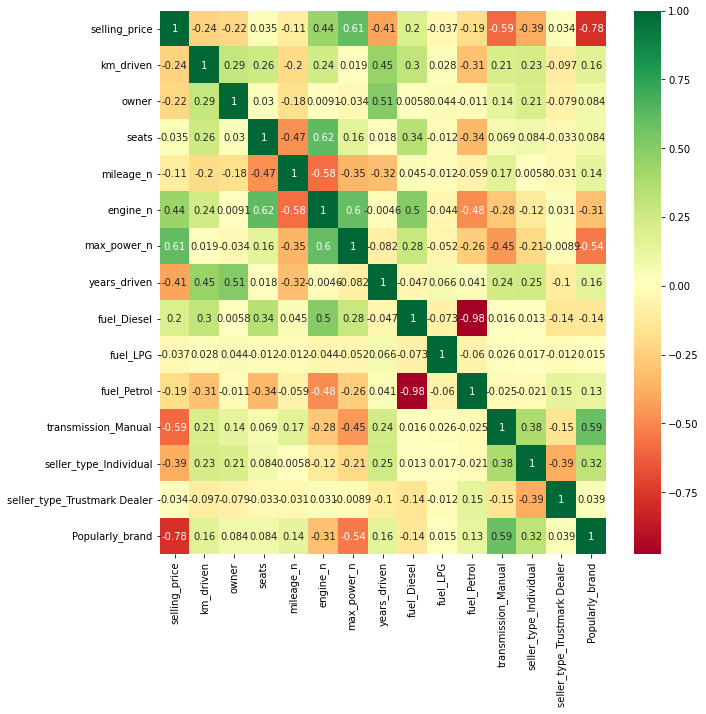

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
Y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,Y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,Y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on Traing set:  0.9932315918334463
Accuracy on Testing set:  0.9707550753252709


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Squared  Error      : ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R Squared Error          : ', metrics.r2_score(Y_test, Y_pred))

		Error Table
Mean Squared  Error      :  17968526895.51379
Root Mean Squared  Error :  134046.7339979374
R Squared Error          :  0.9707550753252709


In [ ]:
predicted = rf_reg.predict(final_test)
Sample = pd.DataFrame(data={'Id': np.arange(1, final_test.shape[0]+1), 'Predicted': predicted})

Sample.head(10)

,Id,Predicted
0,1,645000.000000
1,2,874690.000000
2,3,396954.997500
3,4,545829.990000
4,5,616173.323333
5,6,123502.500000
6,7,113460.000000
7,8,238160.000000
8,9,346879.960000
9,10,685970.000000


In [ ]:
Sample.to_csv('final_17.csv', index = False)